캐글에서 제공되는 Student mental health analysis 데이터셋
  - 정신건강에 영향을 주는 요인은 무엇인가?
  - 데이터를 탐색
    - 속성탐색
    - 결측치 처리
    - 이상치 처리
  - 데이터 시각화
    - 속성간의 관계
    - 속성값의 분포
  - 중요 속성 추출
    - 원핫인코딩
    - 중요속성 추출

In [1]:
!unzip '/content/student_health.zip'

Archive:  /content/student_health.zip
  inflating: Student Mental health.csv  


In [41]:
import pandas as pd
df = pd.read_csv('/content/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [42]:
df.info()
# 결측치 여부
# 데이터 타입(범부형,수치형)
# 숫자인데.. object로 되어 있으면.. 뭔가 문자가 포함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

데이터 전처리

In [43]:
df.columns = ['date','gender','age','course','year','CGPA','Marital_status','Depression','Anxiety','Panic','treatment']

In [44]:
df.year.unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [45]:
mask = {
  'year 1':1,
  'year 2':2,
  'Year 1':1,
  'year 3':3,
  'year 4':4,
  'Year 2':2,
  'Year 3':3
}
df['year'] = df.year.map(mask)

In [46]:
df.describe(include='all')

,date,gender,age,course,year,CGPA,Marital_status,Depression,Anxiety,Panic,treatment
count,101,101,100.00000,101,101.000000,101,101,101,101,101,101
unique,92,2,NaN,49,NaN,6,2,2,2,2,2
top,8/7/2020 12:39,Female,NaN,BCS,NaN,3.50 - 4.00,No,No,No,No,No
freq,3,75,NaN,18,NaN,47,85,66,67,68,95
mean,NaN,NaN,20.53000,NaN,1.970297,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.49628,NaN,0.994540,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.00000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,18.00000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,19.00000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.00000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df['CGPA'] = df['CGPA'].str.strip()

In [48]:
data = df['course'].unique()
data

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

같은의미의 문자열
  - 유사도 측정
  - 클러스터링 알고리즘(K-Means)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [62]:
data = df['course'].unique()

# TF-IDF 백터화
vectorizer =  TfidfVectorizer()
X = vectorizer.fit_transform(data)
kmeans = KMeans()
kmeans.fit(X)
# 클러스터링 결과 출력
for i in range(len(np.unique(kmeans.labels_))):
  cluster_indices = np.where(kmeans.labels_ == i)[0]
  cluster_strings = [data[idx] for idx in cluster_indices]
  print(f"cluster {i+1} : {cluster_strings}")

cluster 1 : ['Islamic Education']
cluster 2 : ['Engineering', 'BIT', 'Law', 'Mathemathics', 'Pendidikan Islam', 'BCS', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'KOE', 'Banking Studies', 'KIRKHS', 'Usuluddin ', 'Engine', 'ALA', 'BENL', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Biotechnology', 'Communication ', 'Fiqh', 'Nursing ']
cluster 3 : ['Radiography']
cluster 4 : ['Business Administration']
cluster 5 : ['TAASL']
cluster 6 : ['Marine science', 'Biomedical science']
cluster 7 : ['Diploma Nursing', 'DIPLOMA TESL']
cluster 8 : ['Human Resources', 'Human Sciences ']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
mask = {
    'Fiqh fatwa ':'Fiqh',
    'Benl':'BENL',
    'Kirkhs':'KIRKHS',
    'psychology':'Psychology',
    'Pendidikan islam':'Pendidikan Islam',
    'Pendidikan Islam ':'Pendidikan Islam',
    'koe':'KOE',
    'Koe':'KOE',
    'Islamic education':'Islamic Education',
    'Laws':'Law',
}
df['course'] = df['course'].replace(mask)

In [53]:
# mask = {
#     'Islamic education':'Islamic Education',
# }
# df['course'] = df['course'].replace(mask)

In [60]:
# mask = {
#     'Laws':'Law',
# }
# df['course'] = df['course'].replace(mask)

In [61]:
df['course'].unique()

array(['Engineering', 'Islamic Education', 'BIT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'KIRKHS',
       'Usuluddin ', 'TAASL', 'Engine', 'ALA', 'Biomedical science',
       'BENL', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop',
       'Human Sciences ', 'Biotechnology', 'Communication ',
       'Diploma Nursing', 'Radiography', 'Fiqh', 'DIPLOMA TESL',
       'Nursing '], dtype=object)

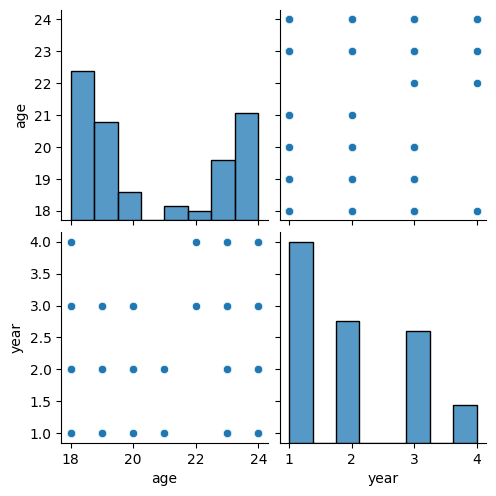

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

count plot을 이용해서 학년과 학과를 시각화

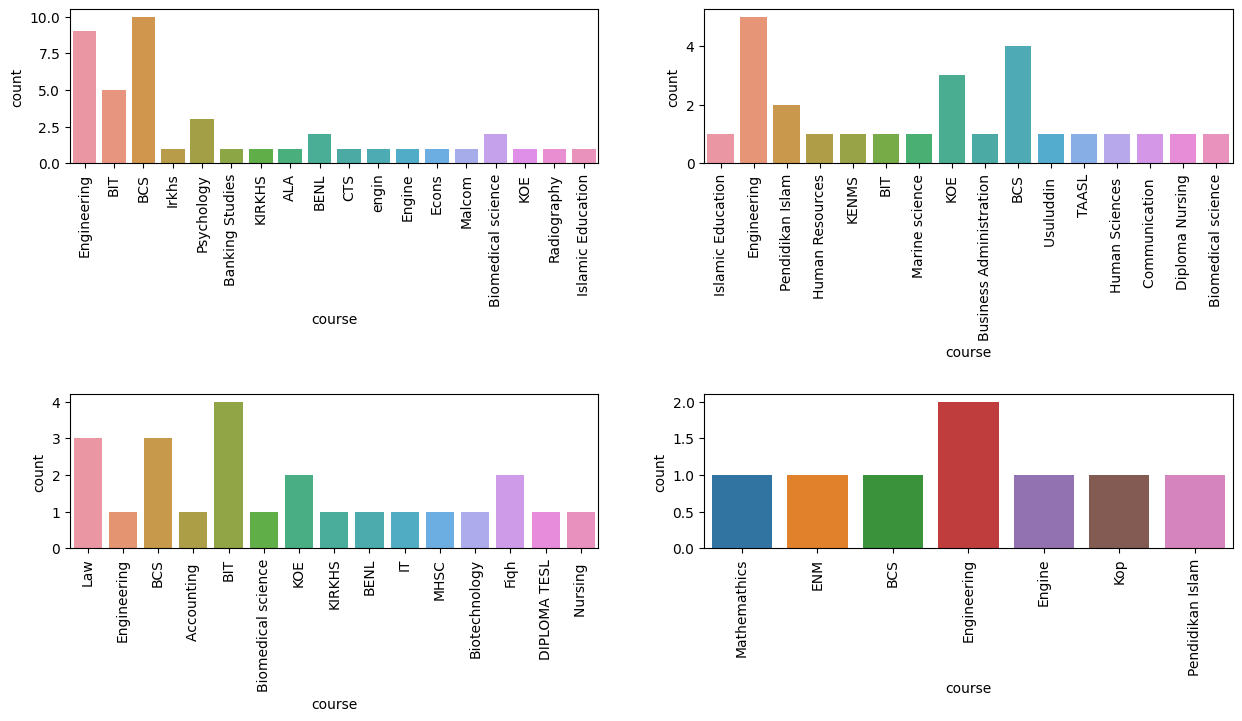

In [79]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
chart = sns.countplot(data = df[df['year'] == 1], x='course')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
chart = sns.countplot(data = df[df['year'] == 2], x='course')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(2,2,3)
chart = sns.countplot(data = df[df['year'] == 3], x='course')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(2,2,4)
chart = sns.countplot(data = df[df['year'] == 4], x='course')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# 세로 간격 조절
plt.subplots_adjust(hspace=1.5)
plt.show()

<ipython-input-84-5c0d53eeab65>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=df, x='Anxiety',y='course',palette=['red','blue'],hue='year')


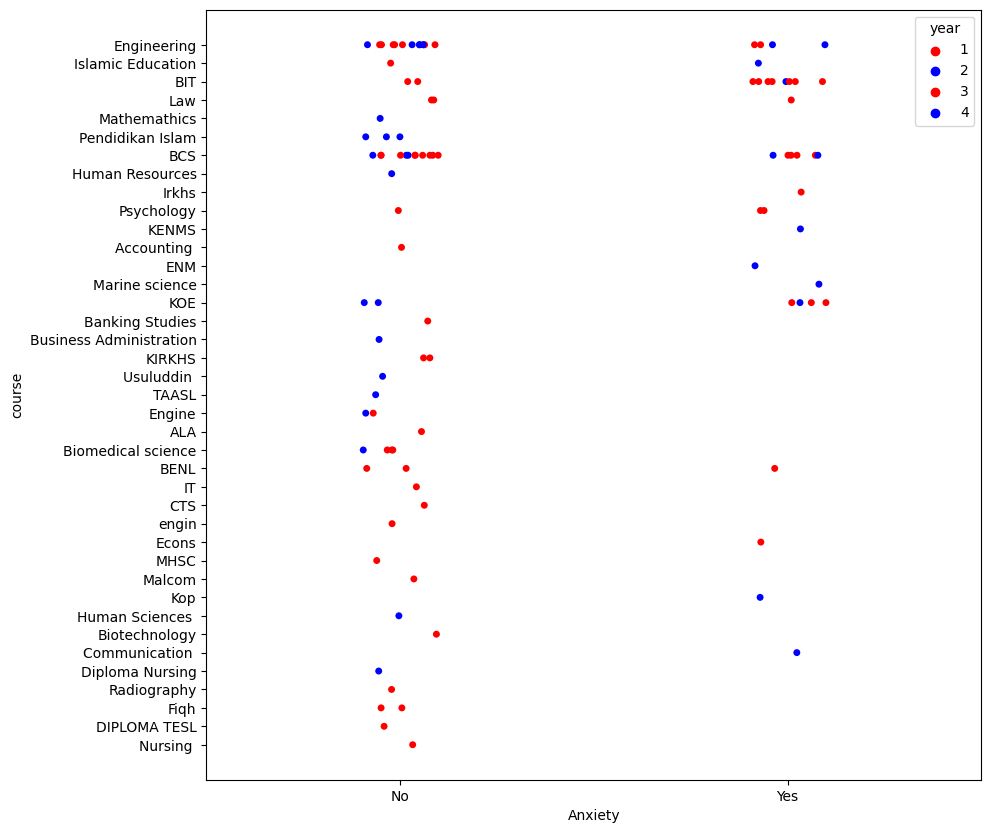

In [84]:
# 불안감 유무에 따른 전공 분포
plt.figure(figsize=(10,10))
sns.stripplot(data=df, x='Anxiety',y='course',palette=['red','blue'],hue='year')
plt.show()

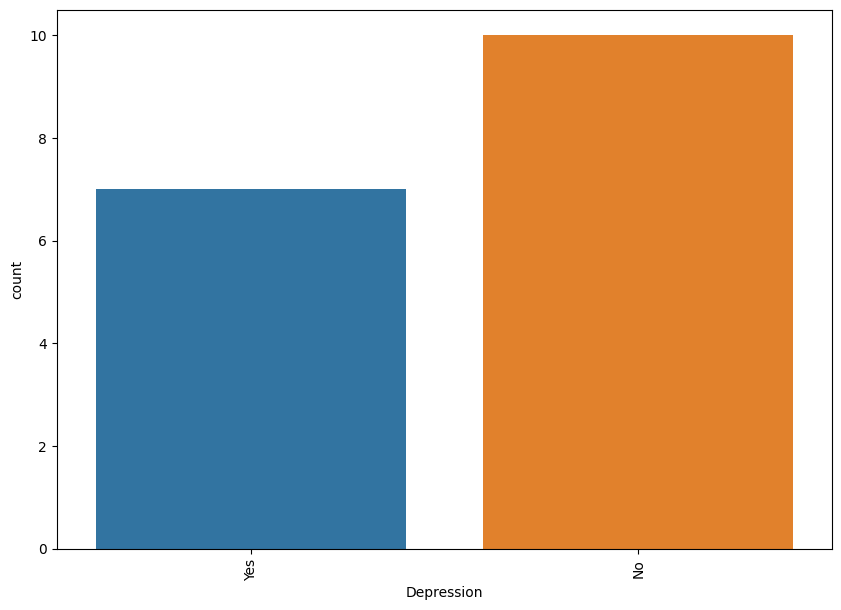

In [89]:
# 우울감 유무에 따른 IT 학생 분포
plt.figure(figsize=(10,7))
chart = sns.countplot(data = df[df['course'] == 'Engineering'], x='Depression')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

<ipython-input-92-22b1d087e2e6>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Depression',y='course',palette=['red','blue'])


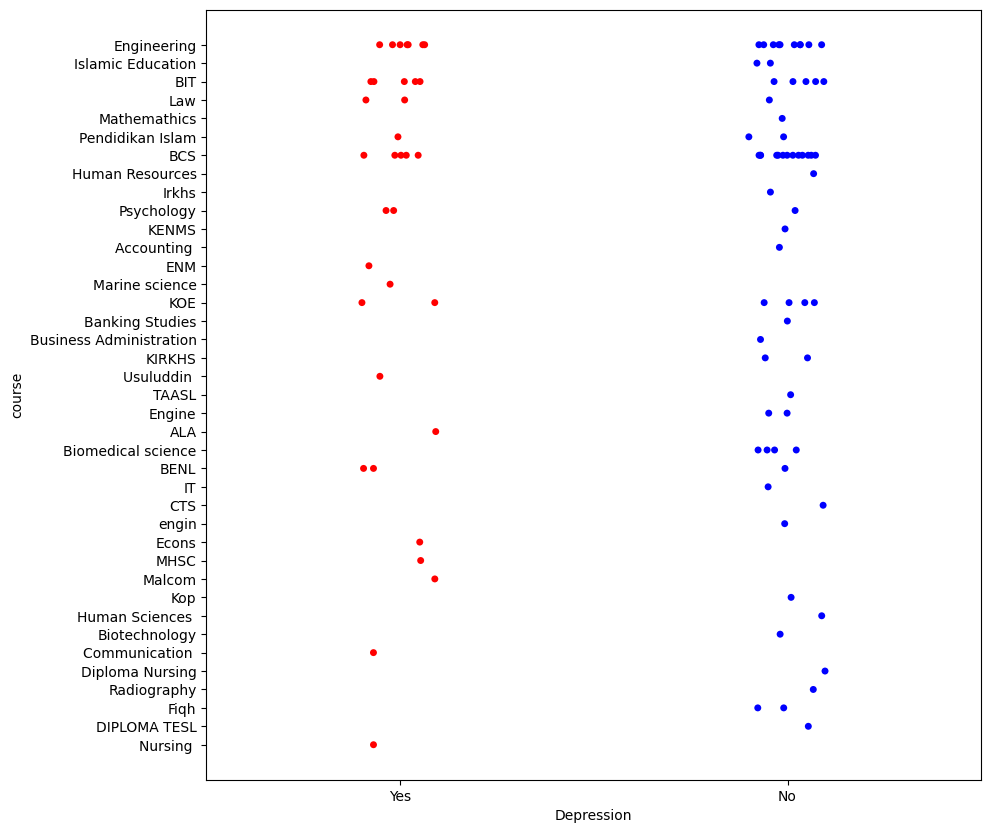

In [92]:
# 불안감 유무에 따른 전공 분포
plt.figure(figsize=(10,10))
sns.stripplot(data=df, x='Depression',y='course',palette=['red','blue'])
plt.show()

상관관계
  - 수치형 데이터로 변환

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            101 non-null    object 
 1   gender          101 non-null    object 
 2   age             100 non-null    float64
 3   course          101 non-null    object 
 4   year            101 non-null    int64  
 5   CGPA            101 non-null    object 
 6   Marital_status  101 non-null    object 
 7   Depression      101 non-null    object 
 8   Anxiety         101 non-null    object 
 9   Panic           101 non-null    object 
 10  treatment       101 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.8+ KB


In [99]:
df2 = df.drop(columns=['date'])
df2['gender'].unique()
mask = {'Female':0, 'Male':1}
# df2['gender'].map(mask)
# df2['gender'].replace(mask)
# df2['gender'].apply(lambda x : mask[x])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df2['gender'])

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [121]:
label_encodings = [le.fit_transform(df2[col]) for col in  df2.select_dtypes(include=['object']).columns]
label_encoding_cols = df2.select_dtypes(include=['object']).columns
dict(zip(label_encoding_cols,label_encodings))
df3 = pd.DataFrame(dict(zip(label_encoding_cols,label_encodings)))
df3.head()

,gender,course,CGPA,Marital_status,Depression,Anxiety,Panic,treatment
0,0,16,3,0,1,0,1,0
1,1,22,3,0,0,1,0,0
2,1,4,3,0,1,1,1,0
3,0,27,3,1,1,0,0,0
4,1,31,3,0,0,0,0,0


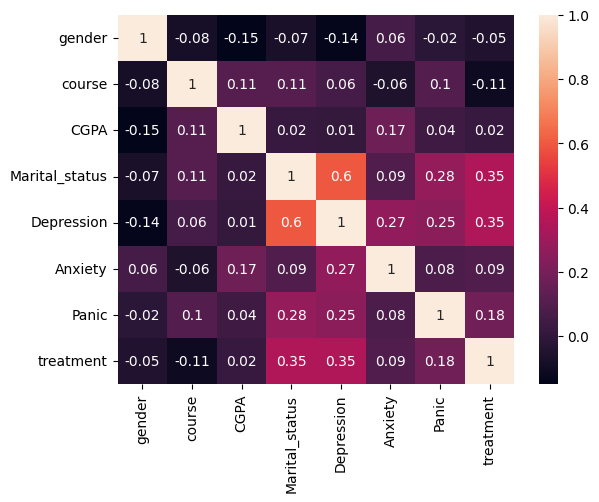

In [124]:
df3_corr = df3.corr().round(2)
sns.heatmap(df3_corr,annot=True)
plt.show()

다음데이터를 시각화 하고 시각적인 요인과 데이터의 상관관계를 통한 분석

In [125]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [126]:
# 범주형 데이터를  수치형으로 변환한고
# 상관관계를 통한 heatmap

In [127]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = tips.select_dtypes('category').columns
temp = [le.fit_transform(tips[cols]) for cols in  cols]

df2 = pd.DataFrame(dict(zip(cols,temp)))
df3 = tips[['total_bill','tip','size']]
df4 = pd.concat([df2,df3], axis=1)
df4

,sex,smoker,day,time,total_bill,tip,size
0,0,0,2,0,16.99,1.01,2
1,1,0,2,0,10.34,1.66,3
2,1,0,2,0,21.01,3.50,3
3,1,0,2,0,23.68,3.31,2
4,0,0,2,0,24.59,3.61,4
...,...,...,...,...,...,...,...
239,1,0,1,0,29.03,5.92,3
240,0,1,1,0,27.18,2.00,2
241,1,1,1,0,22.67,2.00,2
242,1,0,1,0,17.82,1.75,2


<Axes: >

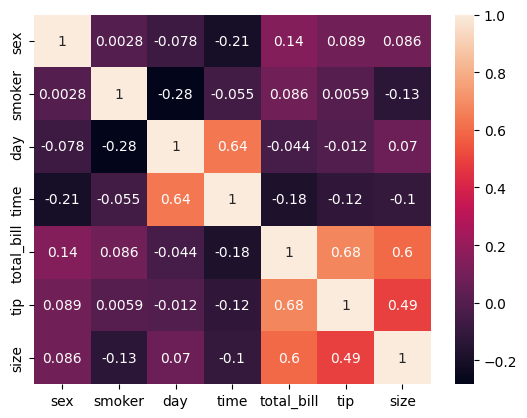

In [141]:
df4_corr = df4.corr()
sns.heatmap(df4_corr, annot=True)

연습문제

In [143]:
# 데이터 불러오기
df = pd.read_csv('/content/연습문제02.csv')
# 데이터 확인
df.info()
# 데이터 기술통계
df.describe()
# 결측치 확인
df.isnull().mean()
#  어떻게 처리할지.. 정해서 처리
# target == 1 이직을 생각하는 사람들의 분포
# city 별 분포
# education_level 학력별 분포
# experience 경력별 분포
# 타겟1인 그룹에서 oo ~ 00년 경력이 가장 많음을 보았다.
# last_new_job 최근 이직시기 분포
# company_size 현재 근무회사의 직원수 시각화
# company_type 현재 근무회사의 종류 시각화

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [154]:
# 나머지는 drop
# 0.1미만인 결측치는 적절한 값으로 대처하고
# 0.1 이상인 컬럼
mask = df.isnull().mean().values>=0.1
drop_cols = df.isnull().mean().index[mask]
mask = df.isnull().mean().values<0.1
fill_cols = df.isnull().mean().index[mask]

In [158]:
df = df.dropna(subset= drop_cols)
df.isnull().sum()

enrollee_id                0
city                       0
city_development_index     0
gender                     0
relevent_experience        0
enrolled_university       63
education_level            0
major_discipline           0
experience                 6
company_size               0
company_type               0
last_new_job              24
training_hours             0
target                     0
dtype: int64

In [168]:
df['last_new_job'].value_counts().index[0], df['enrolled_university'].value_counts().index[0],

('1', 'no_enrollment')

In [ ]:
df['last_new_job'] = df['last_new_job'].fillna('1')
df['enrolled_university'] = df['enrolled_university'].fillna('no_enrollment')

In [171]:
df['experience'].value_counts().index[0]

'>20'

In [ ]:
df['experience'] = df['experience'].fillna('1')

In [173]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [177]:
# city 별 분포
df['city'].value_counts()

city_103    2438
city_21     1140
city_16      840
city_114     656
city_160     401
            ... 
city_107       1
city_121       1
city_129       1
city_139       1
city_25        1
Name: city, Length: 116, dtype: int64

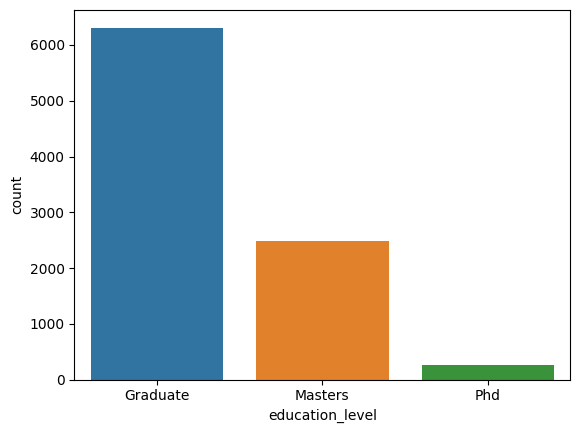

In [178]:
sns.countplot(data=df, x = 'education_level')
plt.show()

<Axes: xlabel='experience', ylabel='count'>

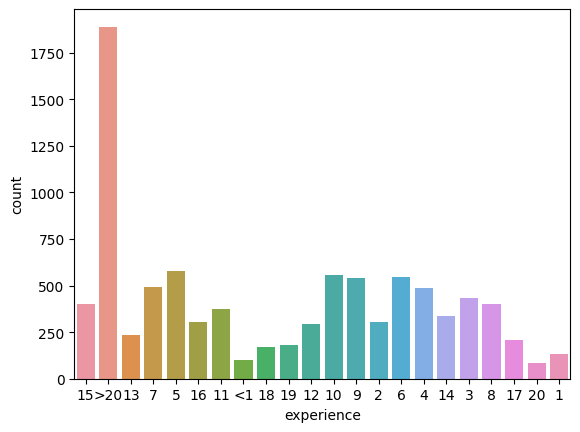

In [184]:
df_target_1 = df[df['target']==1]
df_target_1['experience'].value_counts()
sns.countplot(data=df,x='experience')